# GA Project 1 - JHB (18 April 2016)

##1. Introduction
The data presented here is from a .csv file contaning average SAT data for the 2001 calendar year for all 50 US states and the District of Columbia. Exploratory Data Analysis (EDA) is performed to better understand the data and produce preliminary results. Computer environment was Windows 10 (64-bit), Python 2.7.11 |Anaconda 4.0.0 (64-bit), running Notepad++ (v6.8.8), PyCharm (1.8.0_51-b16x86), and Jupyter notebook (4.1.0).

##2. Preliminary Data Evaluation

###What does the data describe?
The file has data on the percentage of the student population within the state taking the exam (Participation Rate), and the average scores of the students of the Verbal and Math sections per state. There is also an observation of "All", which is not presently identified.  

###Does the data look complete? Any obvious issues with the observations?
The data appears complete for the parameters included. One possible issue with the data includes the < 35% participtation rate for 27 states. This may affect a possible analysis, if not taking into account other factors (i.e. participant rate for other exams, socio-economic factors, or cultural factors). To migitate these issues, data could be grouped by geographic region, participation rate using the ~35% threshold, or additional information could be obtained about other exam participation rates.  

A second is the observation "All" in which the values are not the averages of their respective columns, indicating a yet unidentified parameter (e.g. weighted average?).

###Create a data dictionary for the dataset.

In [8]:
%matplotlib inline

import numpy as np
from numpy import mean, median, var, std
from scipy.stats import mode, linregress
import seaborn as sns
import csv
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
sat_state_dict = {}
with open('sat_scores.csv', 'U') as f:
	reader = csv.reader(f)
	for row in reader:
		key = row[0]
		sat_state_dict[key] = row[1:]
f.close()

print sat_state_dict

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'State': ['Rate', 'Verbal', 'Math'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NB': ['8', '562', '568'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543'

##3. Loading Data

###Load data into a list of lists

In [3]:
sat_state_lstolst = []
with open('sat_scores.csv', 'U') as f:
	reader = csv.reader(f)
	for row in reader:
		sat_state_lstolst.append(row)
f.close()

print sat_state_lstolst

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

###Extract a list of the labels from the data, and remove them from the data.

In [30]:
sat_state_lst_noheader = sat_state_lstolst[1:]
#print sat_state_lst_noheader #no column headers
sat_state_lst_labels = []
sat_state_lst_labels.append(sat_state_lstolst[0:1])
#print sat_state_lst_labels #column headers only

for row in sat_state_lst_noheader:
	sat_state_lst_labels.append(row[0])
#print sat_state_lst_labels #column headers and state names only

sat_state_lst_dataonly = []
for row in sat_state_lst_noheader:
	sat_state_lst_dataonly.append(row[1:])
#print sat_state_lst_dataonly #no column headers or state names

sat_state_lst_dataonly_noall = []
sat_state_lst_dataonly_noall = sat_state_lst_dataonly
del sat_state_lst_dataonly_noall[51]
print sat_state_lst_dataonly_noall #no column headers or state names, no "All" row

[['82', '509', '510'], ['81', '499', '513'], ['79', '511', '515'], ['77', '495', '505'], ['72', '520', '516'], ['71', '501', '499'], ['71', '500', '499'], ['69', '511', '506'], ['69', '506', '500'], ['68', '510', '501'], ['67', '501', '499'], ['65', '508', '510'], ['65', '493', '499'], ['63', '491', '489'], ['60', '499', '501'], ['57', '486', '488'], ['56', '482', '474'], ['55', '526', '526'], ['54', '498', '499'], ['53', '527', '527'], ['53', '493', '499'], ['52', '485', '515'], ['51', '514', '510'], ['51', '498', '517'], ['34', '523', '525'], ['33', '509', '515'], ['31', '539', '542'], ['26', '534', '439'], ['23', '539', '539'], ['18', '527', '512'], ['17', '543', '542'], ['13', '562', '553'], ['13', '551', '542'], ['12', '576', '589'], ['12', '550', '550'], ['11', '547', '545'], ['11', '561', '572'], ['9', '580', '589'], ['9', '577', '580'], ['9', '559', '554'], ['8', '562', '568'], ['8', '567', '561'], ['8', '577', '577'], ['7', '564', '562'], ['6', '584', '596'], ['6', '562', '550

###Create a list of state names extracted from the data (Hint: use the list of labels to index on the state column).

In [35]:
#print sat_state_lst_labels #column headers and state names
sat_state_lst_state_names = sat_state_lst_labels[1:52]
print sat_state_lst_state_names #state names only, no "All"

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


###Print the types of each column

In [36]:
sat_state_lst_rate_column = []
for row in sat_state_lst_dataonly_noall:
	sat_state_lst_rate_column.append(row[0])
#print sat_state_lst_rate_column
print type(sat_state_lst_rate_column)

<type 'list'>


In [37]:
sat_state_lst_verbal_column = []
for row in sat_state_lst_dataonly_noall:
	sat_state_lst_verbal_column.append(row[1])
#print sat_state_lst_verbal_column
print type(sat_state_lst_verbal_column)

<type 'list'>


In [38]:
sat_state_lst_math_column = []
for row in sat_state_lst_dataonly_noall:
	sat_state_lst_math_column.append(row[2])
#print sat_state_lst_math_column
print type(sat_state_lst_math_column)

<type 'list'>


###Do any types need to be reassigned? If so, go ahead and do it.
The data is presently strings, inside a list. The code reassigns the data to integers, inside a list.

In [39]:
sat_state_lst_rate_column_int = [int(x) for x in sat_state_lst_rate_column]
print sat_state_lst_rate_column_int #for example of change
print type(sat_state_lst_rate_column_int)
sat_state_lst_verbal_column_int = [int(x) for x in sat_state_lst_verbal_column]
print type(sat_state_lst_verbal_column_int)
sat_state_lst_math_column_int = [int(x) for x in sat_state_lst_math_column]
print type(sat_state_lst_math_column_int)

[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4]
<type 'list'>
<type 'list'>
<type 'list'>


###Create a dictionary for each column mapping the state to its respective value for that column.

In [40]:
state_rate_dict = {k:v for k,v in zip(sat_state_lst_state_names, sat_state_lst_rate_column)}
print state_rate_dict #for example
state_verbal_dict = {k:v for k,v in zip(sat_state_lst_state_names, sat_state_lst_verbal_column)}
#print state_verbal_dict
state_math_dict = {k:v for k,v in zip(sat_state_lst_state_names, sat_state_lst_math_column)}
#print state_math_dict

{'WA': '53', 'DE': '67', 'DC': '56', 'WI': '6', 'WV': '18', 'HI': '52', 'FL': '54', 'WY': '11', 'NH': '72', 'NJ': '81', 'NM': '13', 'TX': '53', 'LA': '7', 'NB': '8', 'NC': '65', 'ND': '4', 'TN': '13', 'NY': '77', 'PA': '71', 'RI': '71', 'NV': '33', 'VA': '68', 'CO': '31', 'AK': '51', 'AL': '9', 'AR': '6', 'VT': '69', 'IL': '12', 'GA': '63', 'IN': '60', 'IA': '5', 'OK': '8', 'AZ': '34', 'CA': '51', 'ID': '17', 'CT': '82', 'ME': '69', 'MD': '65', 'MA': '79', 'OH': '26', 'UT': '5', 'MO': '8', 'MN': '9', 'MI': '11', 'KS': '9', 'MT': '23', 'MS': '4', 'SC': '57', 'KY': '12', 'OR': '55', 'SD': '4'}


##4. Describe the data.

###Print the min and max of each column.

In [41]:
print "State max average participation rate: ", max(sat_state_lst_rate_column_int), "%"
print "State min average participation rate: ", min(sat_state_lst_rate_column_int), "%"
print "State max average verbal score: ", max(sat_state_lst_verbal_column_int)
print "State min average verbal score: ", min(sat_state_lst_verbal_column_int)
print "State max average math score: ", max(sat_state_lst_math_column_int)
print "State min average math score: ", min(sat_state_lst_math_column_int)

State max average participation rate:  82 %
State min average participation rate:  4 %
State max average verbal score:  593
State min average verbal score:  482
State max average math score:  603
State min average math score:  439


###Write a function using only list comprehensions, no loops to compute standard deviation. Print the standard deviation of each numeric column.

In [109]:
def Variance(x):
	average = sum(x)/len(x)
	
	deviation = list()
	deviation = [(i-average)**2 for i in x]
    
	variance_result = sum(deviation)/len(deviation)
	return variance_result
	
Variance(sat_state_lst_rate_column_int)
Variance(sat_state_lst_verbal_column_int)
Variance(sat_state_lst_math_column_int)

def Standard_Deviation(x):
	stdev = sqrt(Variance(x))
	return stdev
	
print "State average participation rate standard deviation: ", round(Standard_Deviation(
        sat_state_lst_rate_column_int),1), "%"
print "State average verbal score standard deviation: ", round(Standard_Deviation(
        sat_state_lst_verbal_column_int),1)
print "State average math score standard deviation: ", round(Standard_Deviation(
        sat_state_lst_math_column_int),1)

State average participation rate standard deviation:  27.3 %
State average verbal score standard deviation:  33.0
State average math score standard deviation:  35.9


##5. Visualize the data.

###Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

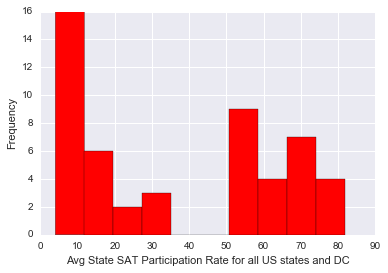

In [110]:
plt.hist(sat_state_lst_rate_column_int, facecolor='red')
plt.xlabel('Avg State SAT Participation Rate for all US states and DC')
plt.ylabel('Frequency')

###Plot the Math distribution.

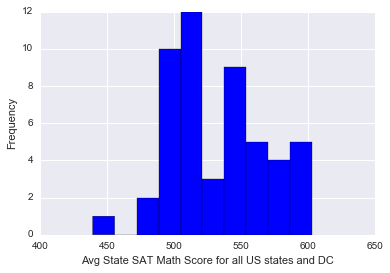

In [44]:
plt.hist(sat_state_lst_math_column_int, facecolor='blue')
plt.xlabel('Avg State SAT Math Score for all US states and DC')
plt.ylabel('Frequency')

###Plot the Verbal distribution.

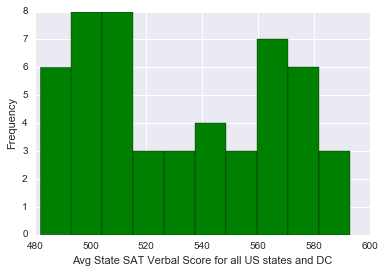

In [45]:
plt.hist(sat_state_lst_verbal_column_int, facecolor='green')
plt.xlabel('Avg State SAT Verbal Score for all US states and DC')
plt.ylabel('Frequency')

###What is the typical assumption for data distribution? Does that distribution hold true for our data?
The typical assumption for independent data is that it is normally distributed (i.e. follows a bell shape when plotted as a histogram. The data here does not show a normal distribution. The parameter visually closest to a bell shape is the Math Score. 

###Plot some scatterplots. BONUS - Use a PyPlot _figure_ to present multiple plots at once. 

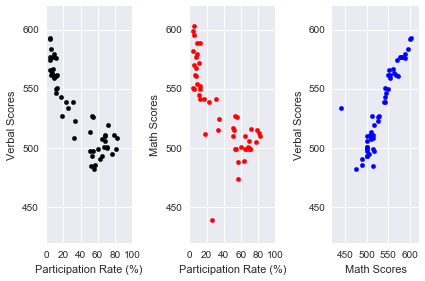

In [55]:
fig = plt.figure()
fig1 = fig.add_subplot(131)
fig2 = fig.add_subplot(132)
fig3 = fig.add_subplot(133)

fig1.scatter(sat_state_lst_rate_column_int, sat_state_lst_verbal_column_int, color = 'black')
fig1.grid(True)
fig1.set_xlabel('Participation Rate (%)')
fig1.set_ylabel('Verbal Scores')
fig1.set_xlim([0,100])
fig1.set_ylim([420,620])
fig2.scatter(sat_state_lst_rate_column_int, sat_state_lst_math_column_int, color = 'red')
fig2.grid(True)
fig2.set_xlabel('Participation Rate (%)')
fig2.set_ylabel('Math Scores')
fig2.set_xlim([0,100])
fig2.set_ylim([420,620])
fig3.scatter(sat_state_lst_math_column_int, sat_state_lst_verbal_column_int, color = 'blue')
fig3.grid(True)
fig3.set_xlabel('Math Scores')
fig3.set_ylabel('Verbal Scores')
fig3.set_xlim([420,620])
fig3.set_ylim([420,620])
plt.tight_layout()

In [66]:
linregress(sat_state_lst_rate_column_int, sat_state_lst_verbal_column_int) #VvPR

LinregressResult(slope=-1.0754110455311974, intercept=572.31962044936017, rvalue=-0.88812091197857634, pvalue=3.6389849178371346e-18, stderr=0.079504867202258092)

In [67]:
linregress(sat_state_lst_rate_column_int, sat_state_lst_math_column_int) #MvPR

LinregressResult(slope=-1.0186814924114671, intercept=569.53435247412631, rvalue=-0.77341925011761437, pvalue=2.8807429099925661e-11, stderr=0.11927312899805101)

In [68]:
linregress(sat_state_lst_math_column_int, sat_state_lst_verbal_column_int) #VvM

LinregressResult(slope=0.82732796946550324, intercept=92.520708945444824, rvalue=0.89990931818110453, pvalue=2.735579353543592e-19, stderr=0.057272241169330683)

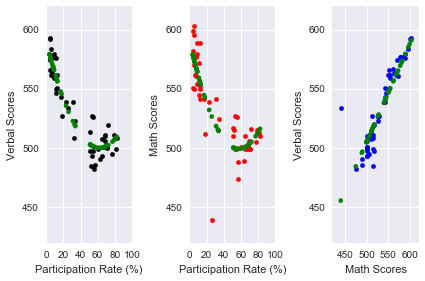

In [97]:
fig = plt.figure()
fig1 = fig.add_subplot(131)
fig2 = fig.add_subplot(132)
fig3 = fig.add_subplot(133)

fig1.scatter(sat_state_lst_rate_column_int, sat_state_lst_verbal_column_int, color = 'black')
fig1.scatter(sat_state_lst_rate_column_int,
         np.poly1d(np.polyfit(sat_state_lst_rate_column_int,
                              sat_state_lst_verbal_column_int, 2))
         (sat_state_lst_rate_column_int), color = 'green', linestyle = '--')
fig1.grid(True)
fig1.set_xlabel('Participation Rate (%)')
fig1.set_ylabel('Verbal Scores')
fig1.set_xlim([0,100])
fig1.set_ylim([420,620])
fig2.scatter(sat_state_lst_rate_column_int, sat_state_lst_math_column_int, color = 'red')
fig2.scatter(sat_state_lst_rate_column_int,
         np.poly1d(np.polyfit(sat_state_lst_rate_column_int,
                              sat_state_lst_math_column_int, 2))
         (sat_state_lst_rate_column_int), color = 'green', linestyle = '--')
fig2.grid(True)
fig2.set_xlabel('Participation Rate (%)')
fig2.set_ylabel('Math Scores')
fig2.set_xlim([0,100])
fig2.set_ylim([420,620])
fig3.scatter(sat_state_lst_math_column_int, sat_state_lst_verbal_column_int, color = 'blue')
fig3.scatter(sat_state_lst_math_column_int,
         np.poly1d(np.polyfit(sat_state_lst_math_column_int,
                              sat_state_lst_verbal_column_int, 1))
         (sat_state_lst_math_column_int), color = 'green', linestyle = '--')

#Linear regression values from polyfit may be different than those from linregress
#Also need a better fit for fig1 and fig2. Second order polynominal fit visually is
#not the best.

fig3.grid(True)
fig3.set_xlabel('Math Scores')
fig3.set_ylabel('Verbal Scores')
fig3.set_xlim([420,620])
fig3.set_ylim([420,620])
plt.tight_layout()

###Are there any interesting relationships to note?
The data shows that both verbal and math scores are inversely related to the participation rate. The best non-linear fit is yet to be determined for both variables versus the participation rate. The verbal and math scores are positively correlated with each other, with almost a 1:1 relationship between them (linregress slope = 0.83). Future work would require that the regression package also perform easily accessible plotting functions, for consistency of quantitative and visual results. Future work could also entail analysis grouped by geographic region. 

###Create box plots for each variable.

(420, 620)

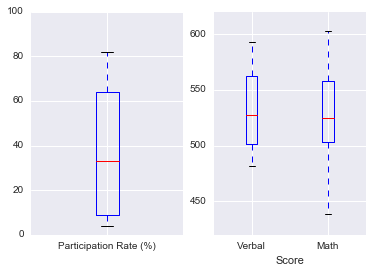

In [108]:
fig = plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

fig1.boxplot(sat_state_lst_rate_column_int, labels = ['Participation Rate (%)'])
fig1.set_ylim([0,100])

fig2.boxplot([sat_state_lst_verbal_column_int, sat_state_lst_math_column_int],
             labels = ['Verbal', 'Math'])
fig2.set_xlabel('Score')
fig2.set_ylim([420,620])

###BONUS - Using Tableau, create a heat map for each variable using a map of the US.

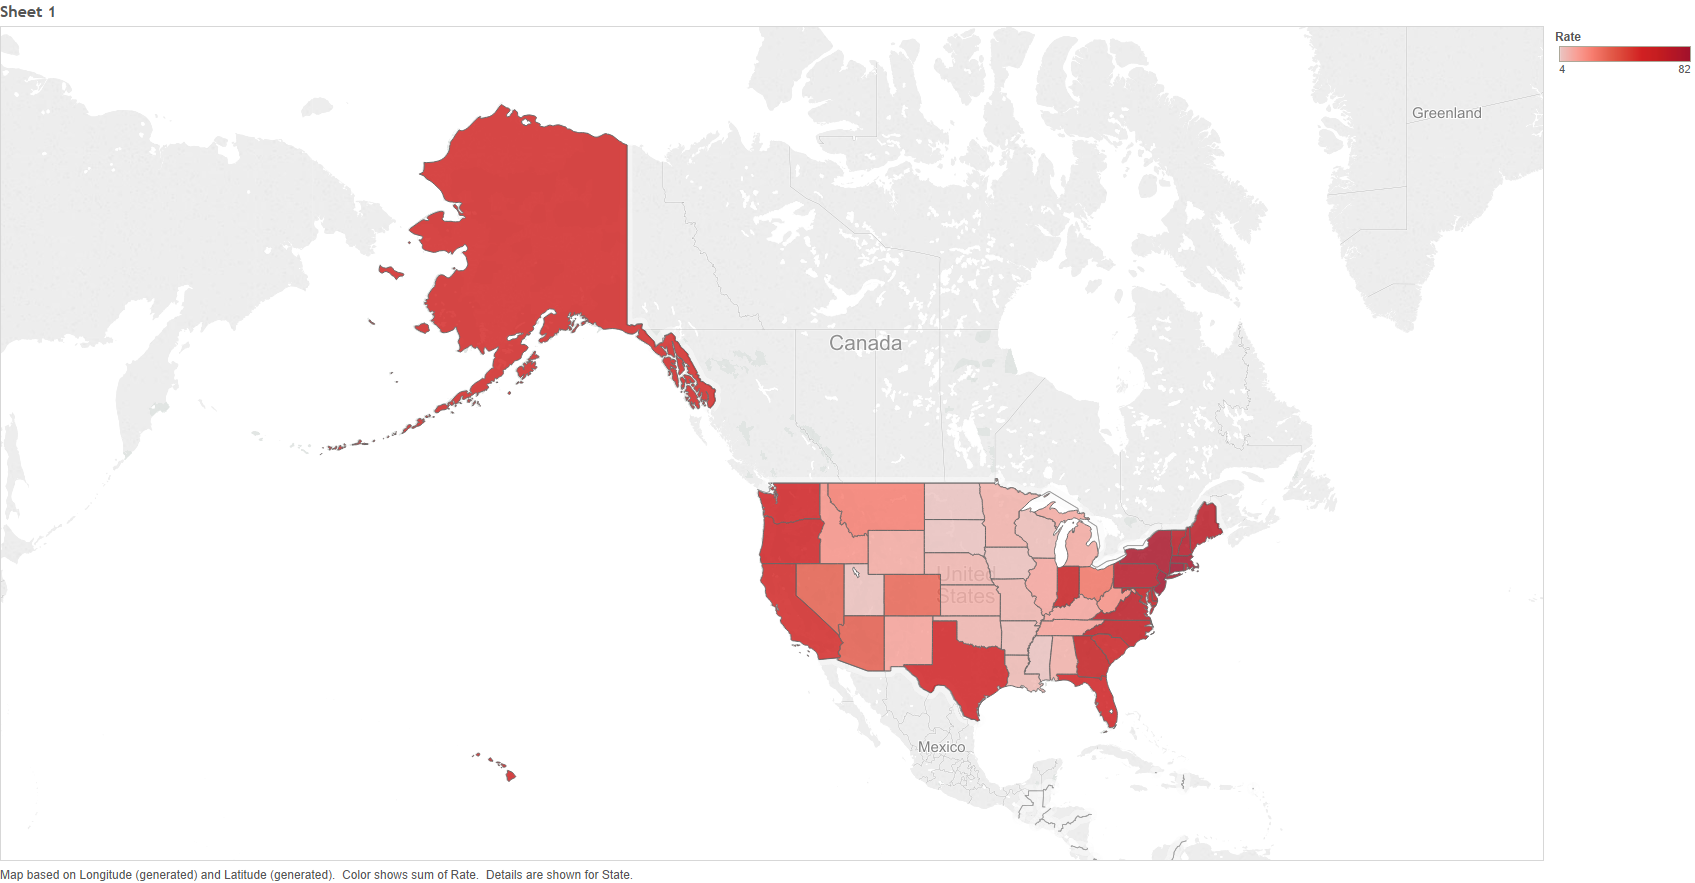

In [9]:
Image(filename = 'Participation rate for US,DC.png')

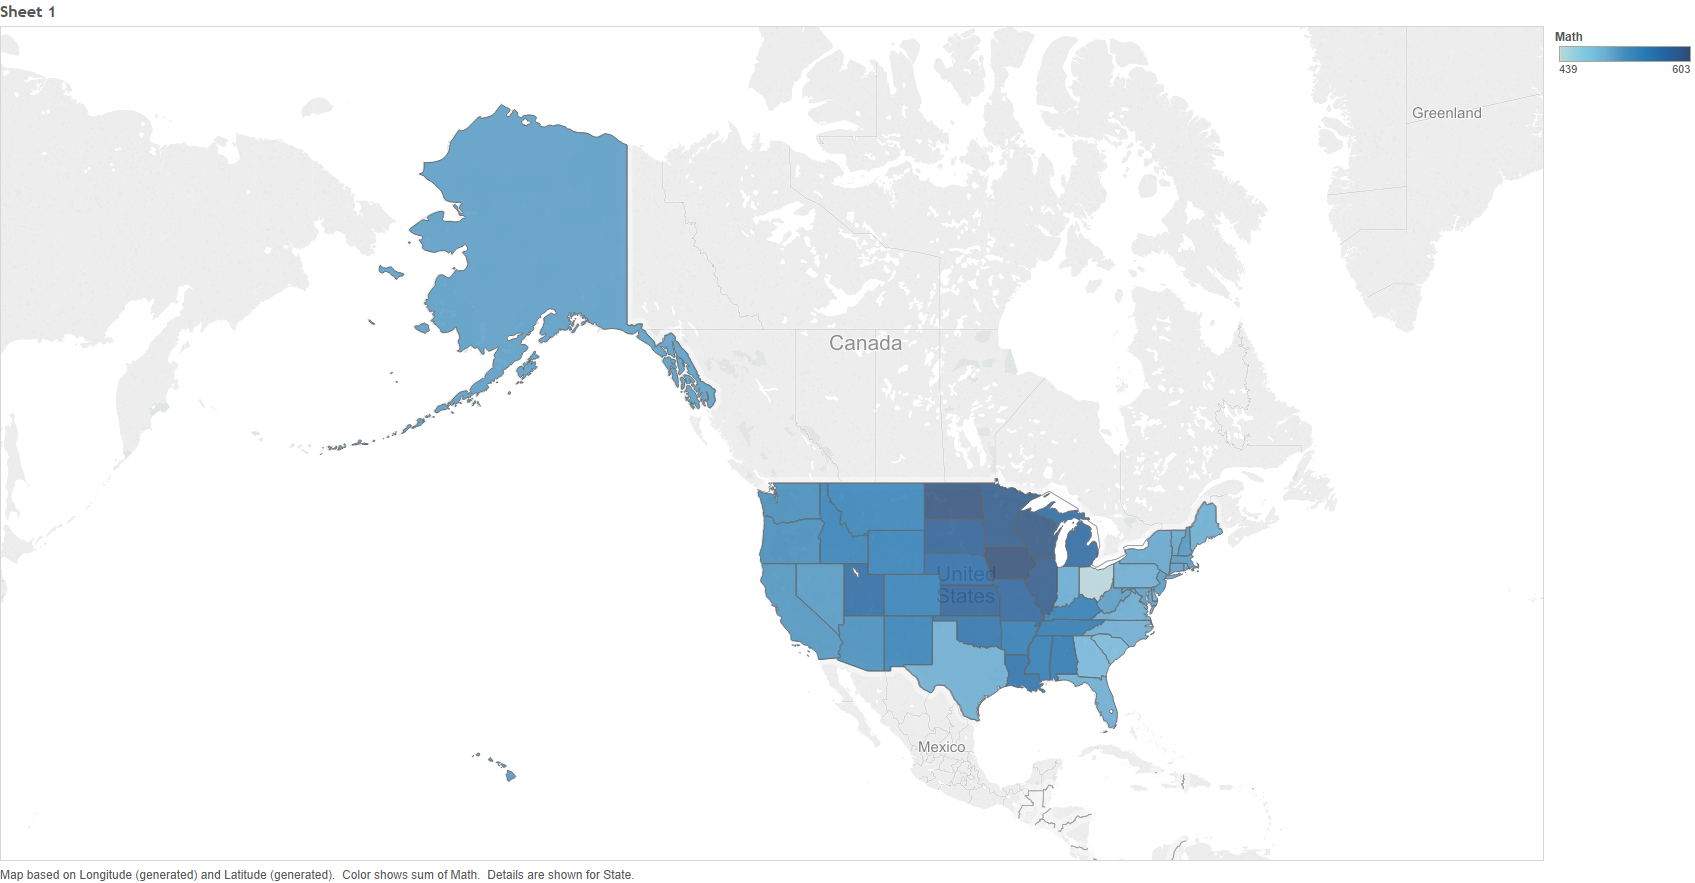

In [10]:
Image(filename = 'Math score for US,DC.png')

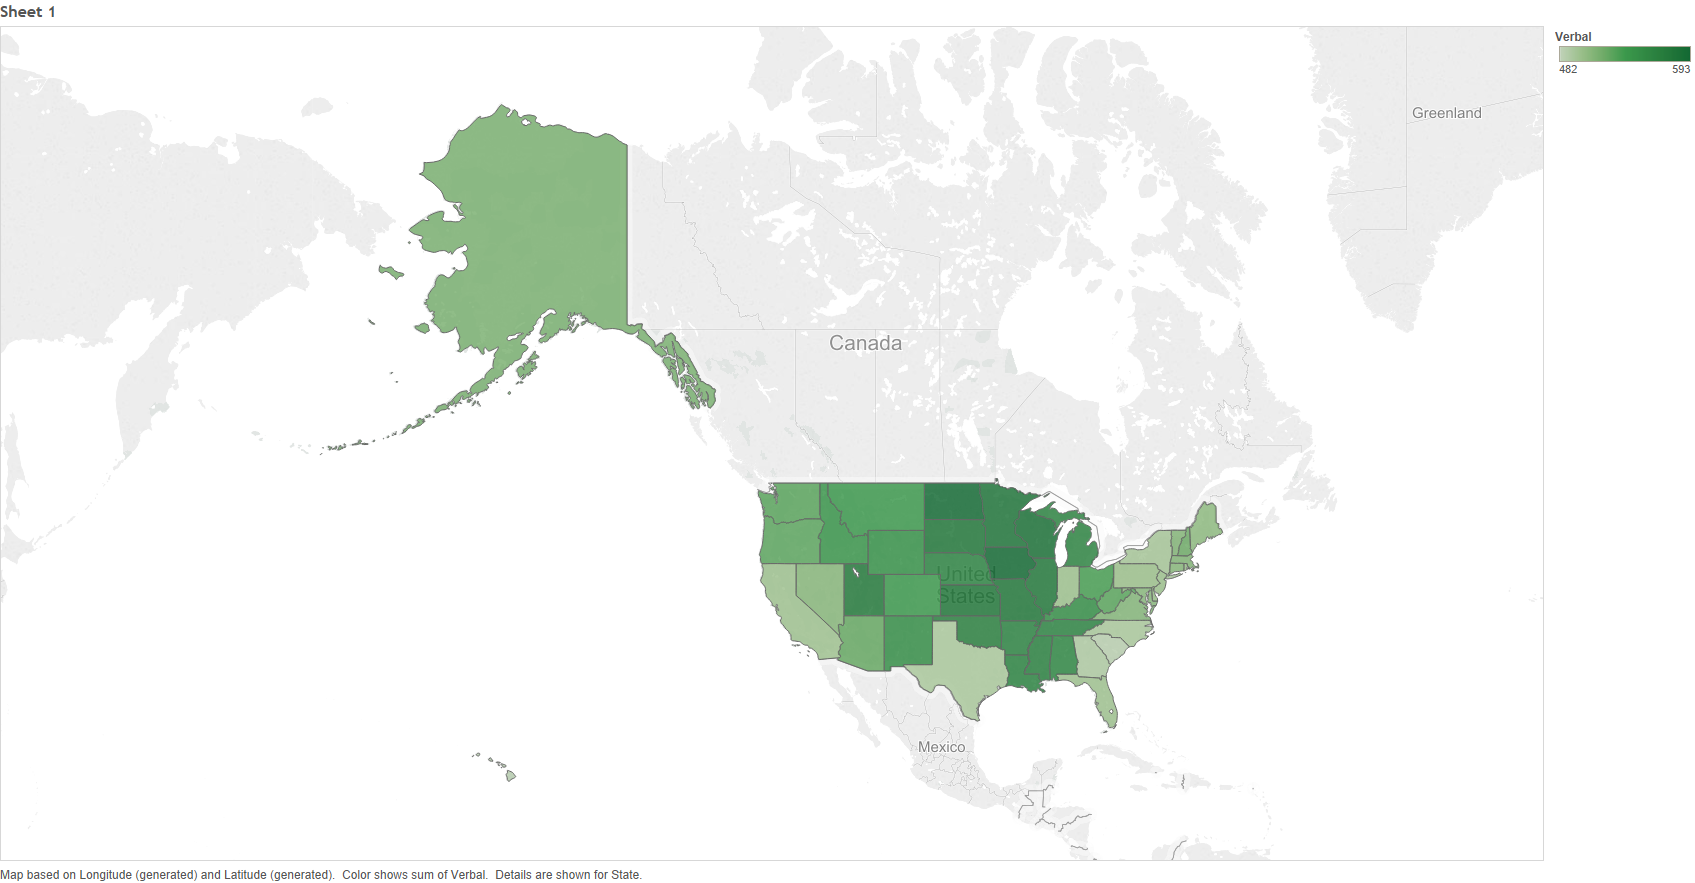

In [11]:
Image(filename = 'Verbal score for US,DC.png')